<a href="https://colab.research.google.com/github/tianchen101/MQRNN/blob/master/MQRNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!rm -rf MQRNN/
!git clone  https://github.com/tianchen101/MQRNN.git

Cloning into 'MQRNN'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 75 (delta 34), reused 60 (delta 21), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [16]:
from MQRNN import Encoder
from MQRNN import Decoder
from MQRNN.MQRNN import MQRNN 
from MQRNN.data import MQRNN_dataset,read_df

In [17]:
config = {
    'horizon_size':40,
    'hidden_size':50,
    'quantiles': [0.8], 
    'columns': [1],
    'dropout': 0.3,
    'layer_size':2,
    'by_direction':False,
    'lr': 1e-3,
    'batch_size': 1,
    'num_epochs':500,
    'context_size': 10,
}

In [18]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [19]:
train_target_df, test_target_df, train_covariate_df, test_covariate_df = read_df(config)
train_target_df = train_target_df.iloc[-500:,:]
train_covariate_df = train_covariate_df.iloc[-500:,:]

In [20]:
train_covariate_df

,hour,dayofweek,month
2020-03-06 12:00:00,1.000125,0.499640,-1.015274
2020-03-07 00:00:00,-0.999875,0.999530,-1.015274
2020-03-07 12:00:00,1.000125,0.999530,-1.015274
2020-03-08 00:00:00,-0.999875,1.499420,-1.015274
2020-03-08 12:00:00,1.000125,1.499420,-1.015274
...,...,...,...
2020-11-09 00:00:00,-0.999875,-1.499922,1.318185
2020-11-09 12:00:00,1.000125,-1.499922,1.318185
2020-11-10 00:00:00,-0.999875,-1.000031,1.318185
2020-11-10 12:00:00,1.000125,-1.000031,1.318185


In [21]:
from MQRNN.data import MQRNN_dataset
dset = MQRNN_dataset(train_target_df,train_covariate_df,40,1 )

self.covariate_df.shape[0] : 500
full_covariate shape: (460, 1, 40, 3)


In [22]:
config['covariate_size'] = train_covariate_df.shape[1]
config['device'] = device
config 

{'batch_size': 1,
 'by_direction': False,
 'columns': [1],
 'context_size': 10,
 'covariate_size': 3,
 'device': device(type='cuda', index=0),
 'dropout': 0.3,
 'hidden_size': 50,
 'horizon_size': 40,
 'layer_size': 2,
 'lr': 0.001,
 'num_epochs': 500,
 'quantiles': [0.8]}

In [23]:
import torch 
horizon_size = config['horizon_size']
hidden_size = config['hidden_size']
quantiles = config['quantiles']
quantile_size = len(quantiles)
columns = config['columns']
dropout = config['dropout']
layer_size = config['layer_size']
by_direction = config['by_direction']
lr = config['lr']
batch_size= config['batch_size']
num_epochs = config['num_epochs']
context_size = config['context_size']
covariate_size = config['covariate_size']
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [24]:
net = MQRNN(horizon_size,hidden_size,quantiles,columns,dropout,layer_size,by_direction,lr,batch_size,num_epochs,context_size,covariate_size,device)

device is: cuda:0


In [25]:
train_dataset = MQRNN_dataset(train_target_df,train_covariate_df,horizon_size,quantile_size)

self.covariate_df.shape[0] : 500
full_covariate shape: (460, 1, 40, 3)


In [26]:
net.train(train_dataset)

epoch_num 5, current loss is: 0.0634191699926404
epoch_num 10, current loss is: 0.06051414600317029
epoch_num 15, current loss is: 0.0602837745555933
epoch_num 20, current loss is: 0.060263295049252714
epoch_num 25, current loss is: 0.060254682900249094
epoch_num 30, current loss is: 0.06018915679489357
epoch_num 35, current loss is: 0.06043555395153986
epoch_num 40, current loss is: 0.060789620662081066
epoch_num 45, current loss is: 0.060482804892719656
epoch_num 50, current loss is: 0.05983023027060688
epoch_num 55, current loss is: 0.0600409961645154
epoch_num 60, current loss is: 0.060172256248584695
epoch_num 65, current loss is: 0.05958402241140172
epoch_num 70, current loss is: 0.059442256319350094
epoch_num 75, current loss is: 0.05939060288581295
epoch_num 80, current loss is: 0.058731294051460596
epoch_num 85, current loss is: 0.05750987265766531
epoch_num 90, current loss is: 0.0560679542430933
epoch_num 95, current loss is: 0.05436063860464787
epoch_num 100, current loss i

In [28]:
predict_result = net.predict(train_target_df,train_covariate_df,test_covariate_df,1 )
predict_result 

input_target_covariate_tensor shape: torch.Size([500, 1, 4])
hidden shape: torch.Size([1, 1, 50])
next_covariate_tensor: torch.Size([1, 1, 120])


{0.8: array([0.        , 0.25059613, 1.07099021, 0.94750033, 0.        ,
        0.        , 0.        , 0.        , 0.9037473 , 1.09585524,
        0.27523815, 0.        , 0.        , 0.        , 0.65895106,
        1.17836503, 0.56863339, 0.        , 0.        , 0.        ,
        0.39809395, 1.16698356, 0.8025114 , 0.        , 0.        ,
        0.        , 0.10739102, 0.96552972, 1.0626443 , 0.08449909,
        0.        , 0.        , 0.        , 0.807638  , 1.12916736,
        0.41336053, 0.        , 0.        , 0.        , 0.54139788])}

In [ ]:
test_target_df

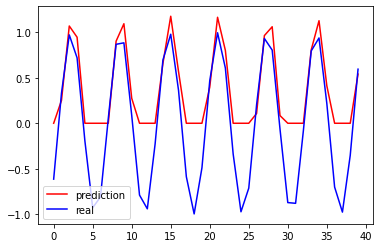

In [31]:
import matplotlib.pyplot as plt
plt.plot(predict_result[0.8], color = 'r', label='prediction')
plt.plot(test_target_df[1].to_list(), color= 'b', label='real')
plt.legend()